## Fase 2 : Metro Go

Con el objetivo de averiguar cuales son las lineas de metro más concurridas para terminar de desarrollar nuestra aplicación Metro Go

Hemos descargado desde ***Kaggle*** un csv que nos indica tanto diariamente como anualmente el número de pasageros que entran y salen de cada estación .Con ello esperamos poder calcular las rutas más rapidas y eficaces para la app 

Las *liberias* que hemos importado para este proyecto son:


*   Pandas
*   Numpy
*   Seaborn
*   Matplotlib






In [ ]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# **Cargamos los datos**

In [ ]:
df_metro=pd.read_csv("2017_Entry_Exit.csv")

In [ ]:
df_metro

,nlc,Station,Borough,Note,Entry_Week,Entry_Saturday,Entry_Sunday,Exit_Week,Exit_Saturday,Exit_Sunday,AnnualEntryExit_Mill
0,500,Acton Town,Ealing,,9531,6716,4744,9382,6617,4785,728.49
1,502,Aldgate,City of London,,15080,4397,3261,16023,5909,4230,918.93
2,503,Aldgate East,Tower Hamlets,,22327,16166,13323,21071,13893,11347,1703.09
3,505,Alperton,Brent,,4495,3279,2345,5081,3392,2445,366.54
4,506,Amersham,Chiltern,,3848,1876,1232,4025,1797,1121,255.15
...,...,...,...,...,...,...,...,...,...,...,...
263,768,Wimbledon Park,Merton,,3583,2648,1605,3301,2235,1600,262.95
264,770,Wood Green,Haringey,,20042,15815,11793,18949,16020,11415,1611.63
265,599,Wood Lane,Hammersmith and Fulham,,6242,4516,2267,6631,4294,2494,470.25
266,769,Woodford,Redbridge,,9442,6937,4140,9537,6301,4142,713.61


In [ ]:
#miramos si nos faltan valores
df_metro.isna().sum()

nlc                     0
Station                 0
Borough                 0
Note                    9
Entry_Week              0
Entry_Saturday          0
Entry_Sunday            0
Exit_Week               0
Exit_Saturday           0
Exit_Sunday             0
AnnualEntryExit_Mill    0
dtype: int64

In [ ]:
#miramos el tipo de cada dato 
df_metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nlc                   268 non-null    int64  
 1   Station               268 non-null    object 
 2   Borough               268 non-null    object 
 3   Note                  259 non-null    object 
 4   Entry_Week            268 non-null    int64  
 5   Entry_Saturday        268 non-null    int64  
 6   Entry_Sunday          268 non-null    int64  
 7   Exit_Week             268 non-null    int64  
 8   Exit_Saturday         268 non-null    int64  
 9   Exit_Sunday           268 non-null    int64  
 10  AnnualEntryExit_Mill  268 non-null    float64
dtypes: float64(1), int64(7), object(3)
memory usage: 23.2+ KB


como podemos ver tenemos una columna que es de tipo objet , esta se corresponden con el nombre de las estacion

In [ ]:
#no tenmos ningún valor nulo en nuestros datos
df_metro.drop(df_metro.dropna().index)

,nlc,Station,Borough,Note,Entry_Week,Entry_Saturday,Entry_Sunday,Exit_Week,Exit_Saturday,Exit_Sunday,AnnualEntryExit_Mill
43,718,Charing Cross,City of Westminster,NaN,30496,26272,16589,29715,22288,12347,2402.49
63,563,East Acton,Hammersmith and Fulham,NaN,6603,4380,3187,6345,3923,3119,484.28
64,565,East Finchley,Barnet,NaN,12133,7616,4980,11528,6609,4958,851.35
94,593,Hammersmith (Dis),Hammersmith and Fulham,NaN,47068,31449,22271,45894,30229,21442,3486.31
129,624,Kingsbury,Brent,NaN,8439,5685,4019,8092,5386,3853,622.92
204,710,South Ruislip,Hillingdon,NaN,3364,2125,1323,3190,1971,1279,236.20
205,711,South Wimbledon,Merton,NaN,8219,5503,3598,7180,5108,3605,583.56
206,712,South Woodford,Redbridge,NaN,7696,4656,2739,9363,6226,3977,612.50
207,705,Southfields,Wandsworth,NaN,10030,7115,4368,9142,5880,4229,719.46


In [ ]:
#limpiamos el dataset y guardamos una copia
df_metro_filt = df_metro.dropna().reset_index(drop=True)
df_metro_filt

,nlc,Station,Borough,Note,Entry_Week,Entry_Saturday,Entry_Sunday,Exit_Week,Exit_Saturday,Exit_Sunday,AnnualEntryExit_Mill
0,500,Acton Town,Ealing,,9531,6716,4744,9382,6617,4785,728.49
1,502,Aldgate,City of London,,15080,4397,3261,16023,5909,4230,918.93
2,503,Aldgate East,Tower Hamlets,,22327,16166,13323,21071,13893,11347,1703.09
3,505,Alperton,Brent,,4495,3279,2345,5081,3392,2445,366.54
4,506,Amersham,Chiltern,,3848,1876,1232,4025,1797,1121,255.15
...,...,...,...,...,...,...,...,...,...,...,...
254,768,Wimbledon Park,Merton,,3583,2648,1605,3301,2235,1600,262.95
255,770,Wood Green,Haringey,,20042,15815,11793,18949,16020,11415,1611.63
256,599,Wood Lane,Hammersmith and Fulham,,6242,4516,2267,6631,4294,2494,470.25
257,769,Woodford,Redbridge,,9442,6937,4140,9537,6301,4142,713.61


# Análisis datos

In [ ]:
#media ,mediana , moda y otros datos interesantes sobre cada columna
df_metro_filt.describe()

,nlc,Entry_Week,Entry_Saturday,Entry_Sunday,Exit_Week,Exit_Saturday,Exit_Sunday,AnnualEntryExit_Mill
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,643.737452,17603.289575,12208.621622,8484.397683,17235.725869,11860.335907,8226.308880,1324.724595
std,85.639142,23579.663808,17366.834350,12188.044786,23684.505940,17434.491018,11784.820047,1808.712309
min,500.000000,618.000000,215.000000,117.000000,704.000000,178.000000,112.000000,37.410000
25%,571.500000,5141.000000,3384.500000,2256.500000,4856.000000,3207.500000,2283.000000,369.730000
50%,640.000000,9525.000000,6383.000000,4269.000000,9196.000000,5915.000000,4232.000000,713.610000
75%,716.500000,20454.000000,12697.000000,9044.500000,19944.500000,12541.500000,8810.000000,1481.080000
max,884.000000,149150.000000,117237.000000,98579.000000,149577.000000,113894.000000,89348.000000,12208.110000


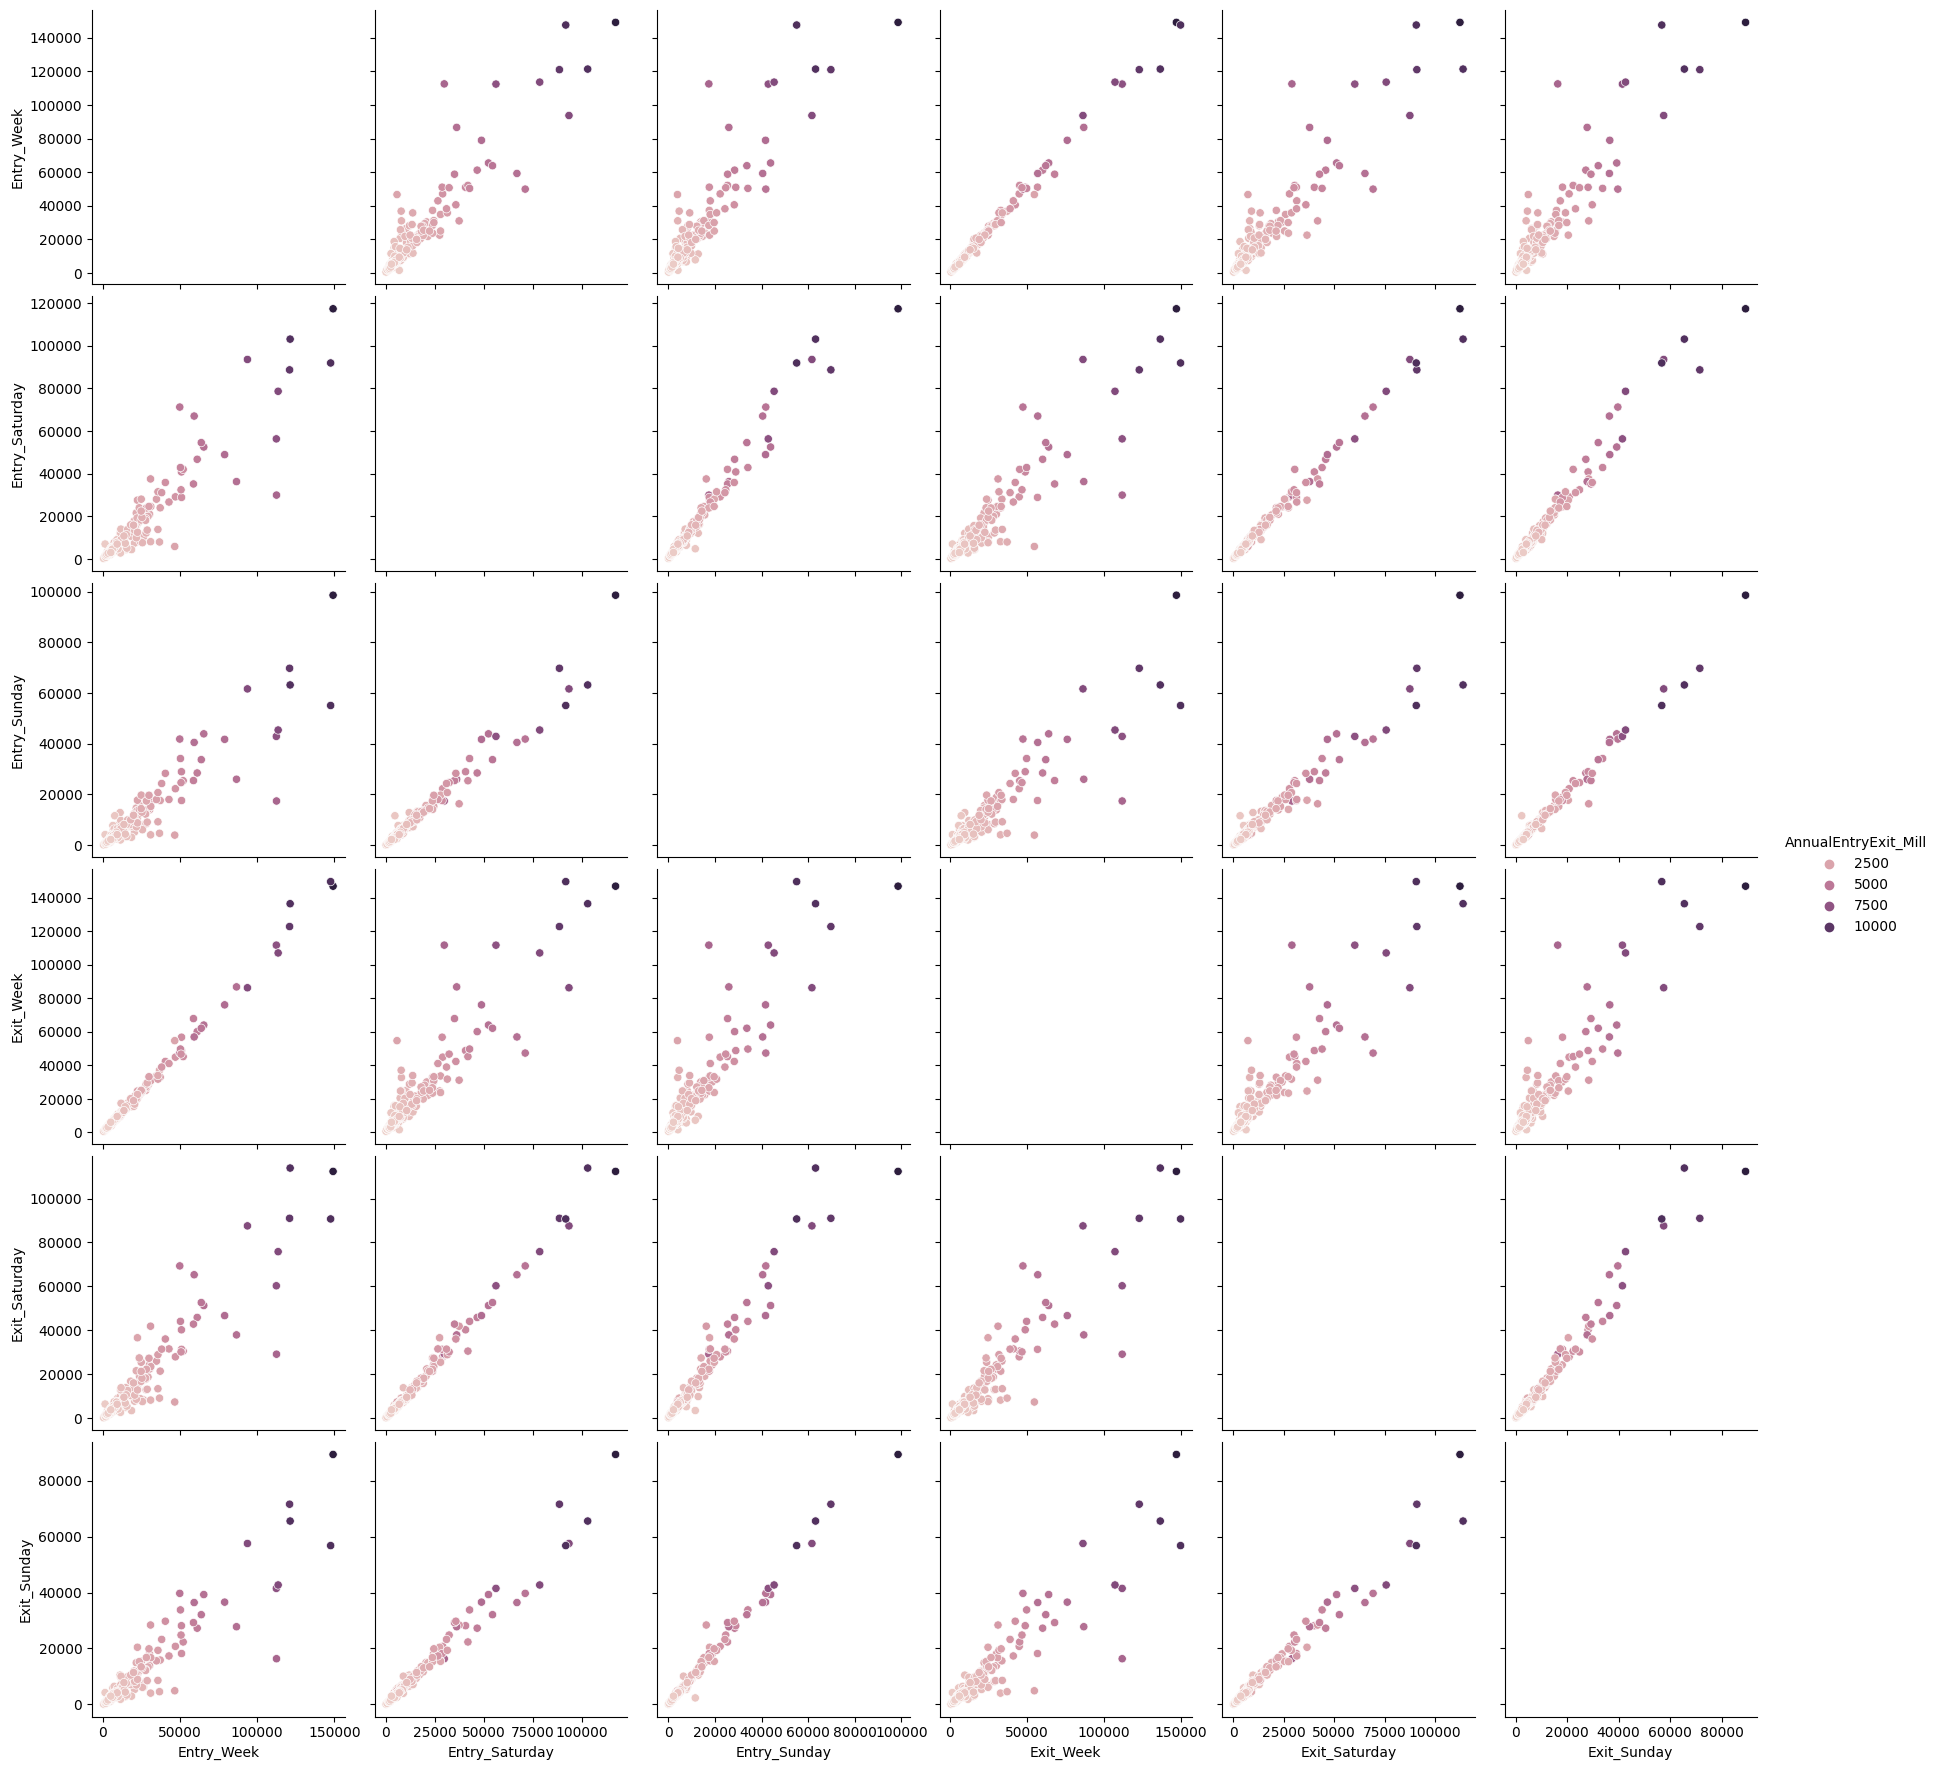

In [ ]:
sns.pairplot(df_metro_filt, hue="AnnualEntryExit_Mill", height=3)
plt.show()

In [ ]:
df_metro_filt.dtypes[df_metro_filt.dtypes=='object'] #consultamos los valores que no son de tipo string

Station    object
Borough    object
Note       object
dtype: object

In [ ]:
df_metro_filt["Station"].value_counts()

Acton Town           1
Snaresbrook          1
Oxford Circus        1
Paddington           1
Park Royal           1
                    ..
Hammersmith (H&C)    1
Hampstead            1
Hanger Lane          1
Harlesden            1
Woodside Park        1
Name: Station, Length: 259, dtype: int64

Se observa que estos datos no nos proporcionan niguna información relevante simplemente se trata de los nombres de las estaciones por ello no merece la pena transformarlos con la libreria sklearn

# Reducción variables

Vamos a filtrar los datos de nuestro dataset eliminando aquellos datos que practicamente no nos proporcionen información.Para ello con la biblioteca **sklearn** vamos a establecer un umbral de varianza de 0.1 para eliminar las variables de varianza muy baja

In [ ]:

from sklearn.feature_selection import VarianceThreshold

#Cogemos las columnas de tipo int
df_metro_numeric = df_metro_filt.select_dtypes(include=['float64', 'int64'])

# Aplicamos una varianza de 0.1
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(df_metro_numeric)
selected_indices = selector.get_support(indices=True)

# Creamos un nuevo DataFrame solo con las variables seleccionadas
df_metro_filt_2 = df_metro_numeric.iloc[:, selected_indices]


In [ ]:
df_metro_filt_2 #parece que en nuestro dataset no hay variables constantes

,nlc,Entry_Week,Entry_Saturday,Entry_Sunday,Exit_Week,Exit_Saturday,Exit_Sunday,AnnualEntryExit_Mill
0,500,9531,6716,4744,9382,6617,4785,728.49
1,502,15080,4397,3261,16023,5909,4230,918.93
2,503,22327,16166,13323,21071,13893,11347,1703.09
3,505,4495,3279,2345,5081,3392,2445,366.54
4,506,3848,1876,1232,4025,1797,1121,255.15
...,...,...,...,...,...,...,...,...
254,768,3583,2648,1605,3301,2235,1600,262.95
255,770,20042,15815,11793,18949,16020,11415,1611.63
256,599,6242,4516,2267,6631,4294,2494,470.25
257,769,9442,6937,4140,9537,6301,4142,713.61


In [ ]:
print(df_metro_filt_2.columns)

Index(['Entry_Week', 'Entry_Saturday', 'Entry_Sunday', 'Exit_Week',
       'Exit_Saturday', 'Exit_Sunday', 'AnnualEntryExit_Mill'],
      dtype='object')


# Importancia de las variables

In [ ]:
# Vamos a considerar que la variable más importante para nosotros es el numero de personas que salen de cada estación anualmente
target = 'AnnualEntryExit_Mill'
features = [x for x in df_metro_filt_2.columns if x!=target]

print(target)
print(features)

AnnualEntryExit_Mill
['Entry_Week', 'Entry_Saturday', 'Entry_Sunday', 'Exit_Week', 'Exit_Saturday', 'Exit_Sunday']


In [ ]:
df_metro_filt_2[target]

0       728.49
1       918.93
2      1703.09
3       366.54
4       255.15
        ...   
254     262.95
255    1611.63
256     470.25
257     713.61
258     411.16
Name: AnnualEntryExit_Mill, Length: 259, dtype: float64

*arbol de decisión*

In [ ]:
from sklearn.tree import DecisionTreeRegressor
arbol_importancia = DecisionTreeRegressor(max_depth=len(features)+10, random_state=100)

arbol_importancia.fit(X=df_metro_filt_2[features], y=df_metro_filt_2[target])

DecisionTreeRegressor(max_depth=17, random_state=100)

Calculamos los posibles porcentajes de error ,así como R^2 que en este caso nos sale 1 por lo tanto podemos asegurar con certeza que los datos son totalamente fiables

In [ ]:

y_pred_arbol = arbol_importancia.predict(X=df_metro_filt_2[features])

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(df_metro_filt_2[target], y_pred_arbol))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_metro_filt_2[target], y_pred_arbol)*100)
print('Mean Squared Error:', mean_squared_error(df_metro_filt_2[target], y_pred_arbol))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_metro_filt_2[target], y_pred_arbol)))
print('R^2 coefficient of determination:', r2_score(df_metro_filt_2[target], y_pred_arbol))

Mean Absolute Error: 0.0
Mean Absolute Percentage Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R^2 coefficient of determination: 1.0


In [ ]:
#variables más importantes
arbol_importancia.feature_importances_

array([6.51465247e-05, 7.08703399e-01, 1.29044413e-03, 1.23202190e-03,
       1.39438831e-01, 4.64848452e-03, 1.44621674e-01])

In [ ]:
#cogemos únicamente los datos más relevantes
importancia = pd.DataFrame(arbol_importancia.feature_importances_, index=features, columns=["Importancia"])
importancia.sort_values(by=importancia.columns[0], ascending=False, inplace=True)
importancia

,Importancia
Entry_Week,0.708703
Exit_Sunday,0.144622
Exit_Week,0.139439
Exit_Saturday,0.004648
Entry_Saturday,0.001290
Entry_Sunday,0.001232
nlc,0.000065


In [ ]:
importancia["imp_acum"] = importancia["Importancia"].cumsum()
importancia

,Importancia,imp_acum
Entry_Week,0.708703,0.708703
Exit_Sunday,0.144622,0.853325
Exit_Week,0.139439,0.992764
Exit_Saturday,0.004648,0.997412
Entry_Saturday,0.001290,0.998703
Entry_Sunday,0.001232,0.999935
nlc,0.000065,1.000000


In [ ]:
#vamos a eliminar la columna nlc que no nos aporta prácticamente ninguna información relevante
df_metro_filt.drop('nlc', axis=1, inplace=True)


# **Clasificación y división dataset en train y test**

Vamos a establecer un percentil de 0.3 de tal manera que en nuestro dataset los datos queden divididos en 


*   Los valores por debajo de 0.3 de la variable target (AnnualEntryExit_Mill)
*   Los valores por encima del percentil 30



In [ ]:
df_metro=df_metro_filt_2.copy()

In [ ]:
print(df_metro_filt_2.columns)

Index(['Entry_Week', 'Entry_Saturday', 'Entry_Sunday', 'Exit_Week',
       'Exit_Saturday', 'Exit_Sunday', 'AnnualEntryExit_Mill'],
      dtype='object')


In [ ]:
#Vamos a sustituir la columna "AnnualEntryExit_Mill" por otra llama escenario


df_metro_filt_2["Escenario"] = np.where(df_metro_filt_2['AnnualEntryExit_Mill'] < df_metro_filt_2['AnnualEntryExit_Mill'].quantile(0.3), 0, 1)

df_metro_filt_2.drop(['AnnualEntryExit_Mill'], axis='columns', inplace=True)
df_metro_filt_2

,Entry_Week,Entry_Saturday,Entry_Sunday,Exit_Week,Exit_Saturday,Exit_Sunday,Escenario
0,9531,6716,4744,9382,6617,4785,1
1,15080,4397,3261,16023,5909,4230,1
2,22327,16166,13323,21071,13893,11347,1
3,4495,3279,2345,5081,3392,2445,0
4,3848,1876,1232,4025,1797,1121,0
...,...,...,...,...,...,...,...
254,3583,2648,1605,3301,2235,1600,0
255,20042,15815,11793,18949,16020,11415,1
256,6242,4516,2267,6631,4294,2494,1
257,9442,6937,4140,9537,6301,4142,1


In [ ]:
df_metro_filt_2.describe()

,Entry_Week,Entry_Saturday,Entry_Sunday,Exit_Week,Exit_Saturday,Exit_Sunday,Escenario
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,17603.289575,12208.621622,8484.397683,17235.725869,11860.335907,8226.308880,0.698842
std,23579.663808,17366.834350,12188.044786,23684.505940,17434.491018,11784.820047,0.459650
min,618.000000,215.000000,117.000000,704.000000,178.000000,112.000000,0.000000
25%,5141.000000,3384.500000,2256.500000,4856.000000,3207.500000,2283.000000,0.000000
50%,9525.000000,6383.000000,4269.000000,9196.000000,5915.000000,4232.000000,1.000000
75%,20454.000000,12697.000000,9044.500000,19944.500000,12541.500000,8810.000000,1.000000
max,149150.000000,117237.000000,98579.000000,149577.000000,113894.000000,89348.000000,1.000000


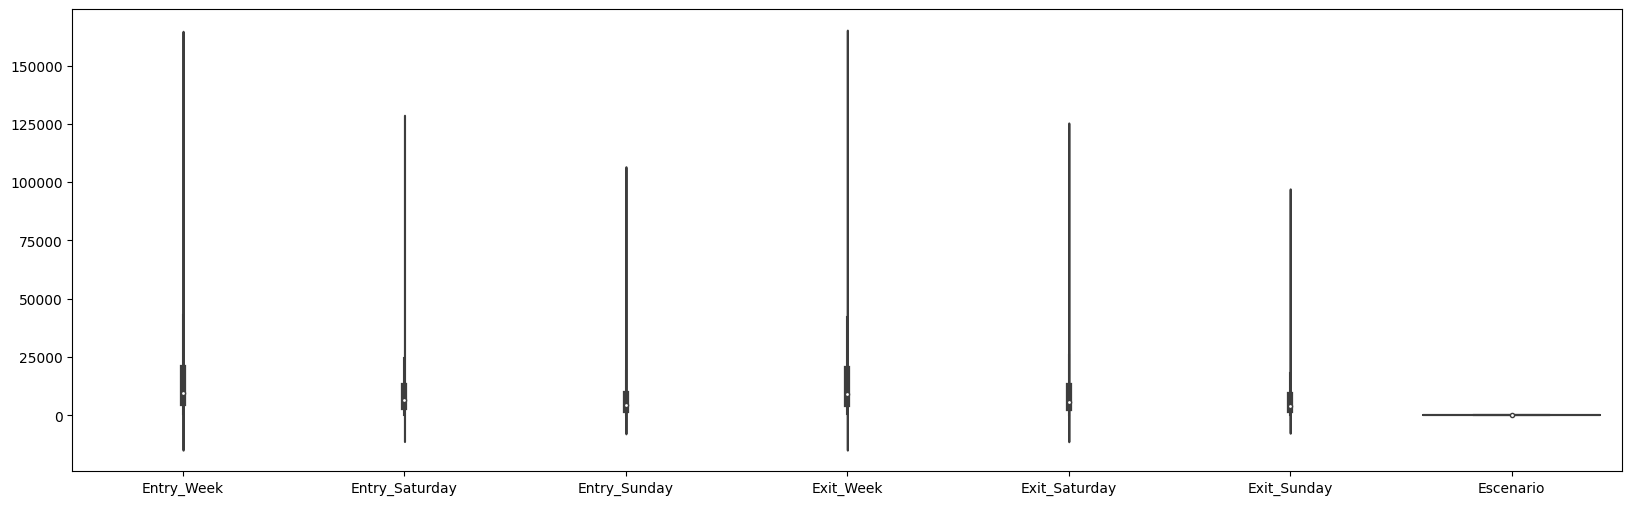

In [ ]:
plt.figure(figsize=(20,6))
sns.violinplot(data=df_metro_filt_2, orient='v')
plt.show()

# **Preparación datos** 

In [ ]:
#declaramos las variables X:"Escenario" e Y:resto variables del dataset
X = df_metro_filt_2.drop('Escenario', axis='columns')
y=df_metro_filt_2["Escenario"]

In [ ]:
from sklearn.preprocessing import StandardScaler

# declarar el tipo de escalamiento y aplicarlo al conjunto de datos
escalado = StandardScaler().fit(X)
dataset_normal = escalado.transform(X)
dataset_normal

array([[-0.34300398, -0.31688308, -0.30748488, -0.33223963, -0.30132727,
        -0.29257737],
       [-0.10721845, -0.45067199, -0.42939707, -0.05130248, -0.34201505,
        -0.33976303],
       [ 0.20071771,  0.22831106,  0.39776441,  0.16224529,  0.1168144 ,
         0.2653187 ],
       ...,
       [-0.48275863, -0.44380658, -0.5111103 , -0.4486164 , -0.43482687,
        -0.48735638],
       [-0.34678572, -0.30413304, -0.35713759, -0.3256826 , -0.31948735,
        -0.34724472],
       [-0.52231825, -0.53144149, -0.51283664, -0.47154487, -0.46551511,
        -0.4471423 ]])

In [ ]:
X_normal = pd.DataFrame(dataset_normal, columns=X.columns)
print(type(X_normal))
X_normal

<class 'pandas.core.frame.DataFrame'>


,Entry_Week,Entry_Saturday,Entry_Sunday,Exit_Week,Exit_Saturday,Exit_Sunday
0,-0.343004,-0.316883,-0.307485,-0.332240,-0.301327,-0.292577
1,-0.107218,-0.450672,-0.429397,-0.051302,-0.342015,-0.339763
2,0.200718,0.228311,0.397764,0.162245,0.116814,0.265319
3,-0.556991,-0.515172,-0.504698,-0.514187,-0.486664,-0.491522
4,-0.584483,-0.596115,-0.596194,-0.558859,-0.578326,-0.604088
...,...,...,...,...,...,...
254,-0.595744,-0.551576,-0.565531,-0.589487,-0.553155,-0.563364
255,0.103625,0.208061,0.271989,0.072477,0.239050,0.271100
256,-0.482759,-0.443807,-0.511110,-0.448616,-0.434827,-0.487356
257,-0.346786,-0.304133,-0.357138,-0.325683,-0.319487,-0.347245


In [ ]:
X_normal.describe()

,Entry_Week,Entry_Saturday,Entry_Sunday,Exit_Week,Exit_Saturday,Exit_Sunday
count,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02
mean,3.429260e-17,-6.858521e-18,1.714630e-17,-2.057556e-17,-4.115112e-17,7.887299e-17
std,1.001936e+00,1.001936e+00,1.001936e+00,1.001936e+00,1.001936e+00,1.001936e+00
min,-7.217310e-01,-6.919420e-01,-6.878542e-01,-6.993489e-01,-6.713677e-01,-6.898721e-01
25%,-5.295418e-01,-5.090856e-01,-5.119735e-01,-5.237050e-01,-4.972665e-01,-5.052954e-01
50%,-3.432589e-01,-3.360947e-01,-3.465330e-01,-3.401081e-01,-3.416702e-01,-3.395930e-01
75%,1.211311e-01,2.817577e-02,4.604403e-02,1.145905e-01,3.914556e-02,4.962496e-02
max,5.589622e+00,6.059350e+00,7.406359e+00,5.598491e+00,5.863734e+00,6.896902e+00


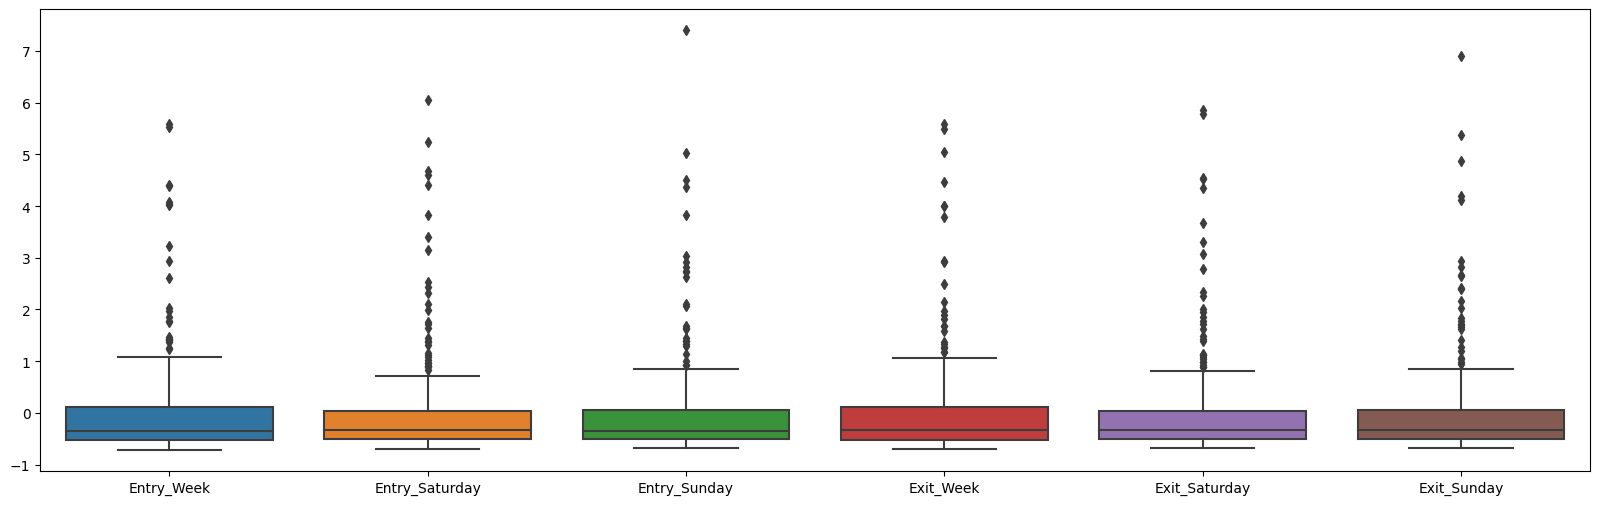

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(data=X_normal,  orient='v')
plt.show()

# **División en training y test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=88)

In [ ]:
#como podemos ver el dataset a quedado dividido de la siguiente manera
print(X_train.shape[0])
print(X_test.shape[0])
X_train.shape[0] + X_test.shape[0]

207
52


259

# **Modelo de regresión**

In [ ]:
from sklearn.linear_model import LogisticRegression 
log_r = LogisticRegression(max_iter=1000,
                           random_state=100)

In [ ]:
log_r.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=100)

Ahora en el siguiente paso vamos a analizar los resultados que hemos obtenido y obtener las predicciones en base a estos

# **Predicciones**

In [ ]:
y_pred = log_r.predict(X_test)
print(y_pred)

[0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0
 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.97      0.97      0.97        35

    accuracy                           0.96        52
   macro avg       0.96      0.96      0.96        52
weighted avg       0.96      0.96      0.96        52



La matriz de confusión se vería de la siguiente manera

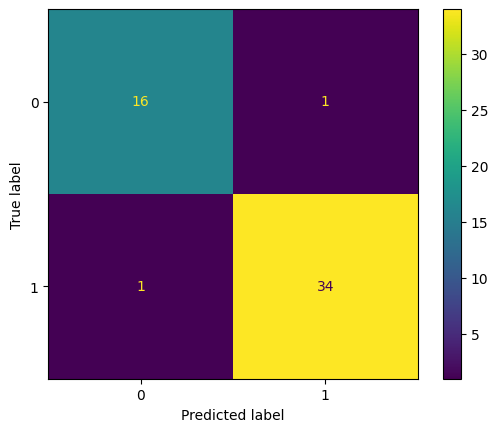

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=log_r.classes_)
disp.plot()

plt.show()

In [ ]:
#Para calcular la curva Roc
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9563025210084034

*Asi se vería nuestra curva*

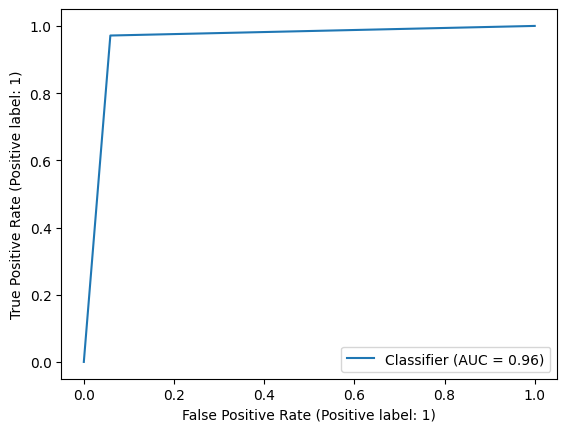

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred)

plt.show()